##### **Identitas Mahasiswa:**
- Nama  : Triyana Dewi Fatmawati <br/>
- NIM   : 2241720206 <br/>
- Kelas : TI - 3H <br/>
- Nomor : 25 <br/>

---

# Tugas Praktikum
**Tugas**
Buatlah sebuah model K-Means dengan ketentuan,
1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.
4. Buatlah  implementasi model SOM untuk segmentasi citra lain

**Pengerjaan:**

##### **1. Menggunakan data 'Mall_Customers.csv'**
Langkah pertama adalah memuat dataset Mall_Customers.csv dan mengeksplorasi data tersebut untuk memahami struktur dan informasi yang ada.

In [1]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##### **2. Menentukan fitur apa yang tepat untuk melakukan clustering**
Untuk melakukan clustering menggunakan K-Means, kita perlu memilih fitur yang tepat. Dalam data Mall Customers, fitur yang tepat untuk digunakan adalah:
1) Annual Income (k$): Ini memberikan informasi tentang daya beli pelanggan.
2) Spending Score (1-100): Ini menunjukkan seberapa banyak pelanggan berbelanja di mall.

In [2]:
# Memilih fitur relevan
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


##### **3. Membuat model K-Means dengan mempertimbangkan jumlah k yang terbaik**

**a. Plot Data**

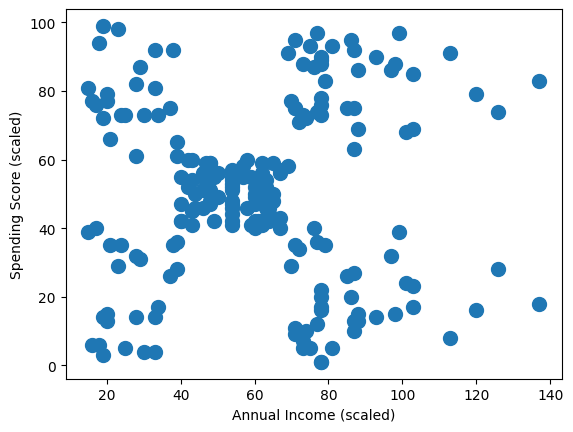

In [3]:
# Menggambarkan data
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=100)
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

**b. Membuat Model K-Means** <br>

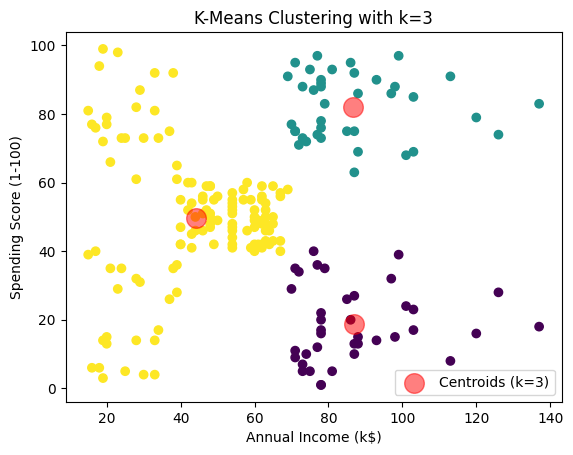

In [37]:
# Membuat model K-Means dengan k=3
k = 3
cl_kmeans = KMeans(n_clusters=k, random_state=42)

# Fit dan prediksi model
y_kmeans = cl_kmeans.fit_predict(X)

# Visualisasi hasil cluster
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=y_kmeans)

# Menentukan centroid dalam skala asli
centers = cl_kmeans.cluster_centers_

# Plot centroid
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, label='Centroids (k=3)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering with k=3')
plt.legend()
plt.show()

**c. Menghitung Nilai SSE (Sum of Squared Errors)**

In [5]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 106348.37306211119


**d. Implementasi metode Elbow**

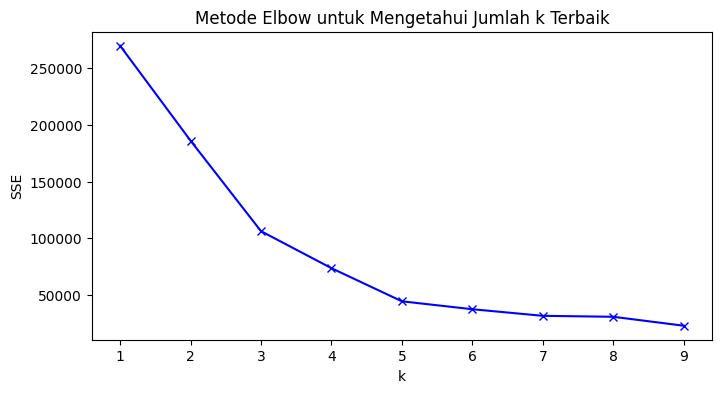

In [6]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

**e. Cek nilai SSE setiap k**

In [7]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=269981.27999999997
k=2; SSE=186206.76002258612
k=3; SSE=106348.37306211119
k=4; SSE=73679.78903948834
k=5; SSE=44448.4554479337
k=6; SSE=37455.984555160285
k=7; SSE=31644.3190379202
k=8; SSE=30790.161345598844
k=9; SSE=22903.32153611588


**Memilih k Terbaik** <br>
Berdasarkan grafik elbow di atas, nilai k terbaik biasanya adalah titik di mana penurunan SSE (Sum of Squared Errors) mulai melambat secara signifikan, sehingga membentuk "siku" pada grafik.

Pada grafik ini, titik siku yang paling jelas terjadi pada k = 5, di mana setelah titik ini penurunan SSE mulai lebih lambat. Oleh karena itu, k = 5 tampaknya menjadi pilihan terbaik untuk jumlah cluster.

##### **Membuat model K-Means dengan mempertimbangkan jumlah k yang terbaik**

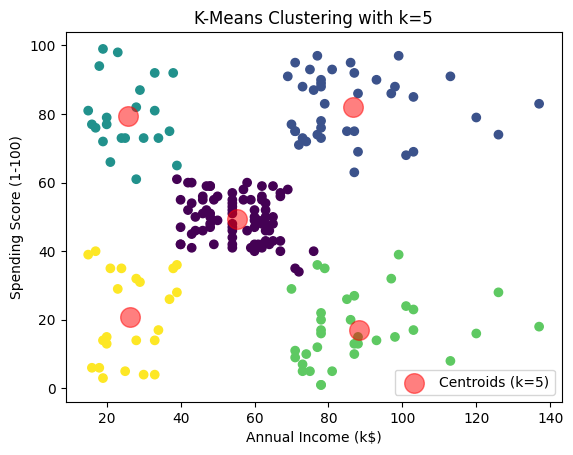

In [38]:
# Membuat model K-Means dengan k=5
k = 5
cl_kmeans = KMeans(n_clusters=k, random_state=42)

# Fit dan prediksi model
y_kmeans = cl_kmeans.fit_predict(X)

# Visualisasi hasil cluster
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=y_kmeans)

# Menentukan centroid dalam skala asli
centers = cl_kmeans.cluster_centers_

# Plot centroid
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, label='Centroids (k=5)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering with k=5')
plt.legend()
plt.show()

In [39]:
# Pilih jumlah cluster yang optimal berdasarkan analisis elbow
optimal_k = 5

# Membangun model K-Means dengan jumlah cluster optimal
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)

# Fit model dengan data yang telah dinormalisasi
kmeans_model.fit(X)

# Menambahkan label cluster ke dalam data asli
df['Cluster'] = kmeans_model.labels_

# Melihat data dengan label cluster
print(df.to_string())

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0             1    Male   19                  15                      39        4
1             2    Male   21                  15                      81        2
2             3  Female   20                  16                       6        4
3             4  Female   23                  16                      77        2
4             5  Female   31                  17                      40        4
5             6  Female   22                  17                      76        2
6             7  Female   35                  18                       6        4
7             8  Female   23                  18                      94        2
8             9    Male   64                  19                       3        4
9            10  Female   30                  19                      72        2
10           11    Male   67                  19                      14        4
11           12 

##### **4. Implementasi Model SOM untuk segmentasi citra lain**



**a. Import library**

In [9]:
from skimage import io

**b. Inisialisasi bobot SOM**

In [10]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

**c. Hitung jarak antara vektor input dan bobot SOM**

In [11]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

**d. Menemukan indeks pemenang**

In [12]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

**e. Update bobot SOM**

In [13]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

**f. Pemrosesan SOM**

In [14]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)

        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

**g. Load citra** <br>
Citra yang saya gunakan yaitu Kucing (cat)

In [15]:
# Load citra JOKOWI
cat_path = "cat.jpg"
Cat = io.imread(cat_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

**h. Latih SOM**

In [28]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(Cat, num_epochs, initial_learning_rate, initial_neighborhood_radius)

**i. Visualisasi bobot SOM**

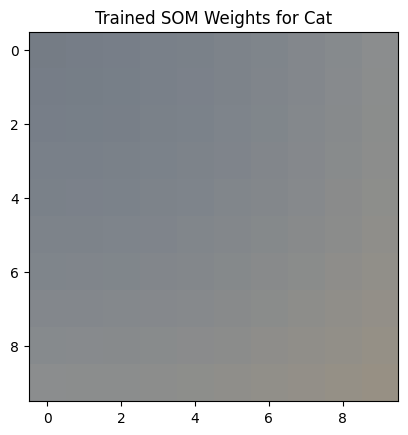

In [29]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Cat')
plt.show()